In [2]:
import os
os.chdir('..')

In [3]:
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np

In [4]:
with open('cache/json_dump.pkl', 'rb') as f:
  parsed = pkl.load(f)

In [5]:
with open('cache/vk_filtered_1500.pkl', 'rb') as f:
  df = pkl.load(f)

In [6]:
df['json'] = pd.Series(parsed.values(), index=parsed.keys())

In [7]:
df

,text,index_info,json
48116,Распродажа \nСережки \nЦена: 60р\nУпк от 10шт ...,"{""vk_wall_id"": -206817857, ""vk_post_id"": 75889}","{'products': [{'name': 'Сережки', 'price': 60,..."
98375,Распродажа \nЦена: 150р \nЦена уп 5×140р\nРазм...,"{""vk_wall_id"": -203393330, ""vk_post_id"": 103913}","{'place': 'https://vk.com/ylstore3001', 'produ..."
48348,Распродажа\nРост:86-92-98-104-110-116\nЦена: 5...,"{""vk_wall_id"": -206817857, ""vk_post_id"": 76318}","{'place': '', 'products': [{'name': '1-5-20 ко..."
104934,Распродажа \nКрюч \nЦена:35р\nАрт:9-46,"{""vk_wall_id"": -203393330, ""vk_post_id"": 116860}","{'place': '', 'products': [{'name': 'Крюч', 'p..."
10099,Распродажа\nЦена: 300р\nТкань: кожа двухнитка\...,"{""vk_wall_id"": -209013890, ""vk_post_id"": 53366}","{'place': 'null', 'products': [{'name': 'Распр..."
...,...,...,...
109287,Распродажа\nЦена: 50р\nРазмер: 86-92.92-98. 98...,"{""vk_wall_id"": -203393330, ""vk_post_id"": 125493}",NaN
44659,Распродажа \nКофточка Водолазки\nТкань: шерсть...,"{""vk_wall_id"": -206817857, ""vk_post_id"": 69518}","{'place': '', 'products': [{'name': 'Кофточка ..."
106707,"Распродажа\nНабор канцелярский в стакане ""МУЛЬ...","{""vk_wall_id"": -203393330, ""vk_post_id"": 120526}","{'place': 'уточнить', 'products': [{'name': 'н..."
84485,Распродажа\nНаволочки\nЦена: 70р\nЦена упк: 20...,"{""vk_wall_id"": -203393330, ""vk_post_id"": 78003}","{'place': '', 'products': [{'name': 'Наволочка..."


In [8]:
df = df[df.json.apply(lambda obj: type(obj) is dict)]
len(df)

1463

In [9]:
df.reset_index(drop=True).to_pickle('cache/final_vk_1500.pkl')

In [23]:
df.iloc[0].text

'Распродажа \nСережки \nЦена: 60р\nУпк от 10шт 40р\nАрт: 2в-85 корпус А'

In [26]:
print(df.iloc[0].text)
print(df.iloc[0].json)

Распродажа 
Сережки 
Цена: 60р
Упк от 10шт 40р
Арт: 2в-85 корпус А
{'products': [{'name': 'Сережки', 'price': 60, 'currency': 'рубли', 'count': 1}], 'place': ''}


In [31]:
product_count = df.json.apply(lambda js: len(js['products']) if type(js) is dict else -1)

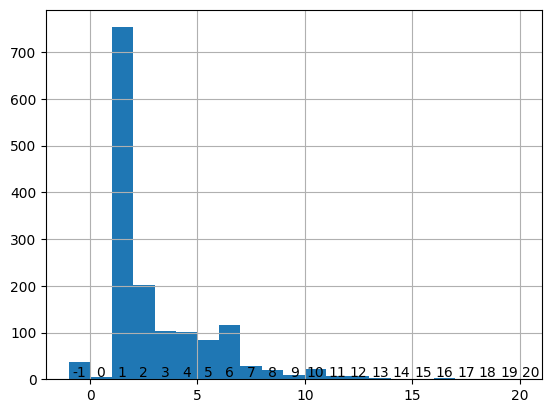

In [47]:
plt.hist(product_count.values, bins=range(-1, 21))
for i in range(-1, 21):
    plt.text(i + 0.5, 0, str(i), ha='center', va='bottom')

plt.grid(True);

In [49]:
sum(product_count > 6)

99

In [51]:
sum(product_count)

3874

(array([1025.,  377.,   44.,   18.,   15.,    7.,    7.,    2.,    2.,
           3.]),
 array([ 30. , 122.5, 215. , 307.5, 400. , 492.5, 585. , 677.5, 770. ,
        862.5, 955. ]),
 <BarContainer object of 10 artists>)

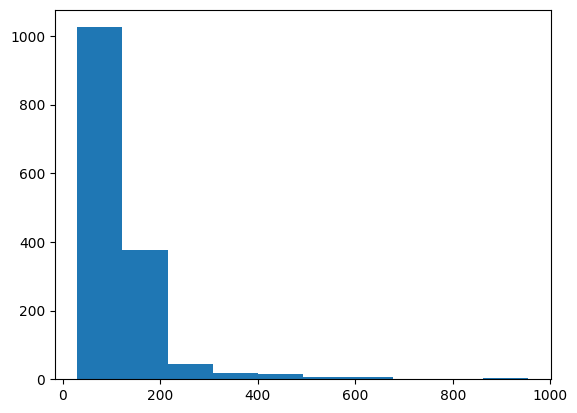

In [54]:
plt.hist(df.text.apply(len))

In [58]:
print(df.text[df.text.apply(len) > 600].values[0])

#БНИ_ПродамБУ_Самара
#БНИ_Авито 
#БНИ_11606038   

1. Арнак с допом. Состояние отличное. Карты все были в протекторах. 4500 
2. Поиски планеты Х, состояние отличное, использовалось всего листа 4. 2900
3. Инновация. Редкая редкость и старая старость. Состояние на 4. Одна карта немного замята. Ни на что не влияет. 800 
4. Нусфьорд. Состояние отличное. Карты были в протекторах. Из бонусов-колода камбала. Сам печатал и делал вставки. 3500
5. Маленькие империи Самураи. Состояние идельное. 2 партии. 3000
6. Халлертау 4000
7. Keyflower+ доп. База русская, доп польский, правила на русском. Игра языконезависимая. 6000
